Yingshu Wang

Breast cancer data includes 569 observations of cancer biopsies, each with 32 characteristics (variables).
One feature is an identification number (ID), another is a cancer diagnosis, and 30 are numerical
laboratory measurements.

In [4]:
import pandas as pd
import numpy as np

In [382]:
!pip install sweetviz


In [69]:
df_diabetes = pd.read_csv('dataset.csv')

In [70]:
df_diabetes.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,0.2360,0.6656,1.670,17.43,0.008045,0.011800,0.01683,0.012410,0.01924,0.002248,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,0.4505,1.1970,3.430,27.10,0.007470,0.035810,0.03354,0.013650,0.03504,0.003318,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,0.1967,1.3870,1.342,13.54,0.005158,0.009355,0.01056,0.007483,0.01718,0.002198,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,0.3384,1.3430,1.851,26.33,0.011270,0.034980,0.02187,0.019650,0.01580,0.003442,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,0.1783,0.4125,1.338,17.72,0.005012,0.014850,0.01551,0.009155,0.01647,0.001767,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
5,906539,B,11.57,19.04,74.20,409.7,0.08546,0.07722,0.05485,0.01428,0.2031,0.06267,0.2864,1.4400,2.206,20.30,0.007278,0.020470,0.04447,0.008799,0.01868,0.003339,13.07,26.98,86.43,520.5,0.1249,0.1937,0.25600,0.06664,0.3035,0.08284
6,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,0.2388,2.9040,1.936,16.97,0.008200,0.029820,0.05738,0.012670,0.01488,0.004738,12.48,37.16,82.28,474.2,0.1298,0.2517,0.36300,0.09653,0.2112,0.08732
7,87880,M,13.81,23.75,91.56,597.8,0.13230,0.17680,0.15580,0.09176,0.2251,0.07421,0.5648,1.9300,3.909,52.72,0.008824,0.031080,0.03112,0.012910,0.01998,0.004506,19.20,41.85,128.50,1153.0,0.2226,0.5209,0.46460,0.20130,0.4432,0.10860
8,862989,B,10.49,19.29,67.41,336.1,0.09989,0.08578,0.02995,0.01201,0.2217,0.06481,0.3550,1.5340,2.302,23.13,0.007595,0.022190,0.02880,0.008614,0.02710,0.003451,11.54,23.31,74.22,402.8,0.1219,0.1486,0.07987,0.03203,0.2826,0.07552
9,89827,B,11.06,14.96,71.49,373.9,0.10330,0.09097,0.05397,0.03341,0.1776,0.06907,0.1601,0.8225,1.355,10.80,0.007416,0.018770,0.02758,0.010100,0.02348,0.002917,11.92,19.90,79.76,440.0,0.1418,0.2210,0.22990,0.10750,0.3301,0.09080


In [7]:
df_diabetes.dtypes

id                     int64
diagnosis             object
radius_mean          float64
texture_mean         float64
perimeter_mean       float64
area_mean            float64
smoothness_mean      float64
compactness_mean     float64
concavity_mean       float64
points_mean          float64
symmetry_mean        float64
dimension_mean       float64
radius_se            float64
texture_se           float64
perimeter_se         float64
area_se              float64
smoothness_se        float64
compactness_se       float64
concavity_se         float64
points_se            float64
symmetry_se          float64
dimension_se         float64
radius_worst         float64
texture_worst        float64
perimeter_worst      float64
area_worst           float64
smoothness_worst     float64
compactness_worst    float64
concavity_worst      float64
points_worst         float64
symmetry_worst       float64
dimension_worst      float64
dtype: object

In [8]:
df_diabetes.shape

(569, 32)

In [71]:
df_diabetes.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [72]:
df_diabetes.isnull().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

#Data Preprocessing (droplines, encode)
- The id value is unuseful for data analysis
- Organize laboratory measurements

In [73]:
df_diabetes= df_diabetes.drop(columns=['id'])
#drop id data


In [74]:
df_diabetes.describe().transpose()  #checking general data

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


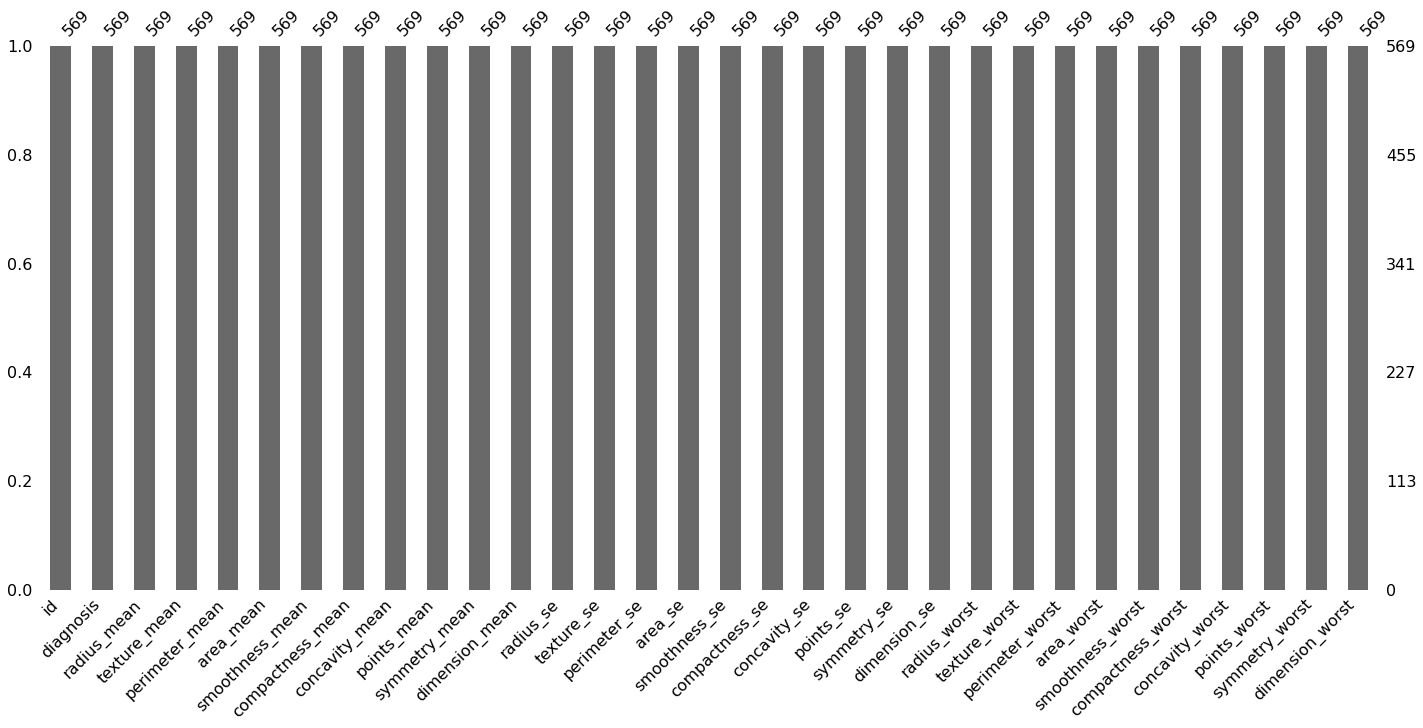

In [53]:
import missingno as msno
msno.bar(df_diabetes);
df_diabetes = df_diabetes.replace(0, np.NaN)
#replace missing data

No missing Data

In [75]:

# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
labels = label_encoder.fit_transform(df_diabetes["diagnosis"])


def dia_to_num(a):
  if a == 'B':
    return 1
  if a == 'M':
    return 2
  else: return 3

df_diabetes["diagnosis"] = df_diabetes["diagnosis"].apply(dia_to_num)


display(df_diabetes)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,1,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,0.2360,0.6656,1.670,17.43,0.008045,0.011800,0.01683,0.012410,0.01924,0.002248,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,0.4505,1.1970,3.430,27.10,0.007470,0.035810,0.03354,0.013650,0.03504,0.003318,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,1,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,0.1967,1.3870,1.342,13.54,0.005158,0.009355,0.01056,0.007483,0.01718,0.002198,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,1,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,0.3384,1.3430,1.851,26.33,0.011270,0.034980,0.02187,0.019650,0.01580,0.003442,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,1,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,0.1783,0.4125,1.338,17.72,0.005012,0.014850,0.01551,0.009155,0.01647,0.001767,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,0.1454,0.05549,0.2023,0.6850,1.236,16.89,0.005969,0.014930,0.01564,0.008463,0.01093,0.001672,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,1,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,0.07005,0.3380,2.5090,2.394,19.33,0.017360,0.046710,0.02611,0.012960,0.03675,0.006758,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,2,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,0.06317,0.2054,0.4956,1.344,19.53,0.003290,0.013950,0.01774,0.006009,0.01172,0.002575,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,1,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,0.1650,0.06121,0.3060,0.7213,2.143,25.70,0.006133,0.012510,0.01615,0.011360,0.02207,0.003563,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


In [76]:
# drop dulicate lines

df_diabetes.drop_duplicates()
display(df_diabetes)



,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,1,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,0.2360,0.6656,1.670,17.43,0.008045,0.011800,0.01683,0.012410,0.01924,0.002248,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,0.4505,1.1970,3.430,27.10,0.007470,0.035810,0.03354,0.013650,0.03504,0.003318,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,1,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,0.1967,1.3870,1.342,13.54,0.005158,0.009355,0.01056,0.007483,0.01718,0.002198,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,1,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,0.3384,1.3430,1.851,26.33,0.011270,0.034980,0.02187,0.019650,0.01580,0.003442,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,1,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,0.1783,0.4125,1.338,17.72,0.005012,0.014850,0.01551,0.009155,0.01647,0.001767,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,0.1454,0.05549,0.2023,0.6850,1.236,16.89,0.005969,0.014930,0.01564,0.008463,0.01093,0.001672,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,1,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,0.07005,0.3380,2.5090,2.394,19.33,0.017360,0.046710,0.02611,0.012960,0.03675,0.006758,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,2,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,0.06317,0.2054,0.4956,1.344,19.53,0.003290,0.013950,0.01774,0.006009,0.01172,0.002575,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,1,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,0.1650,0.06121,0.3060,0.7213,2.143,25.70,0.006133,0.012510,0.01615,0.011360,0.02207,0.003563,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


- Dropping dulipcate lines, There is no same line.

#EDA

 - B for 1 indicate benign
 - M for 2 malignant




In [77]:
(df_diabetes["diagnosis"].value_counts()*100)/len(df_diabetes)

#“ M” Bad，“ B” positive. The diagnosis is coded as "M" to indicate malignant or "B" for indicate benign.

1    62.741652
2    37.258348
Name: diagnosis, dtype: float64

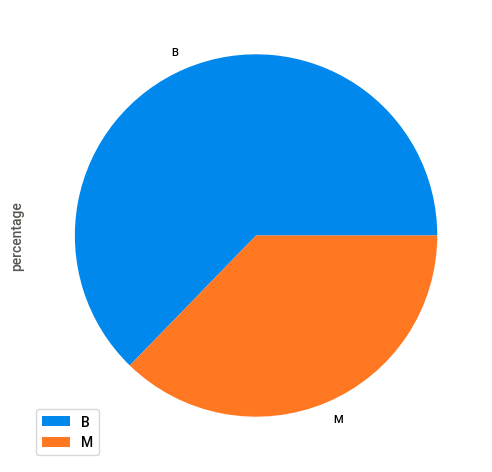

In [78]:
df = pd.DataFrame({'percentage': [62.71, 37.26]}, index=['B', 'M'])

plot = df.plot.pie(subplots=True, figsize=(11, 6))

Above half of the cancer biopsies is indicate benign..

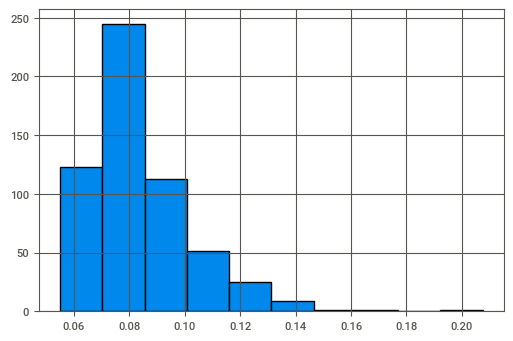

In [79]:
(df_diabetes["dimension_worst"]).hist(edgecolor = "black");

The most of dimension wrost case is close to 0.08
Others report is shown below

In [80]:
import sweetviz as sv
diabetes_report = sv.analyze(df_diabetes)
diabetes_report.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


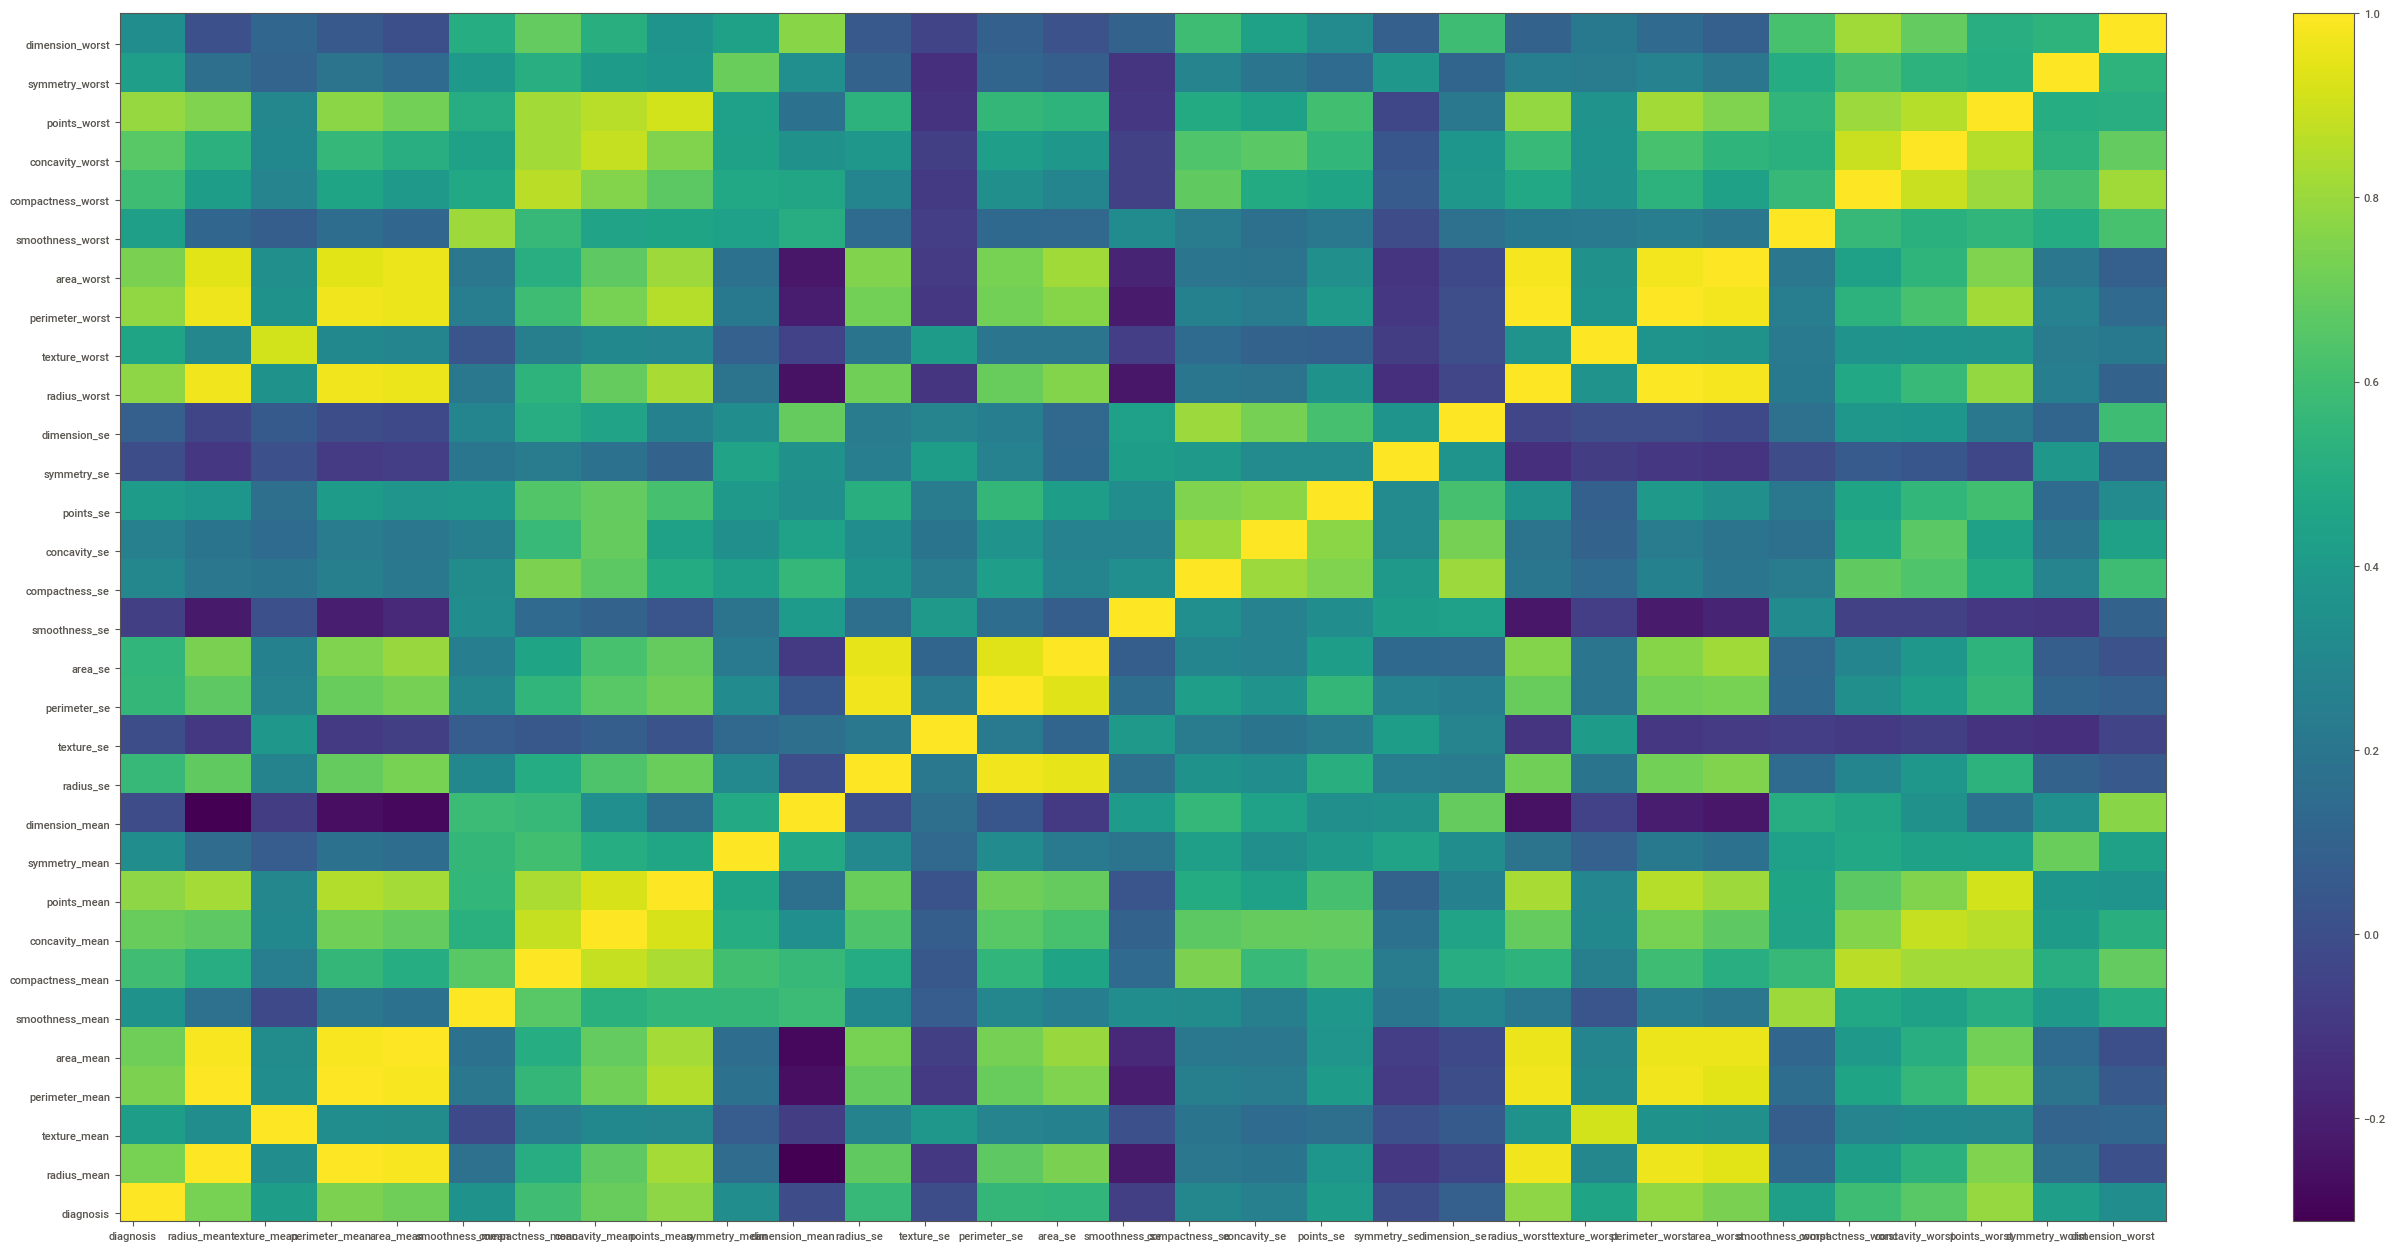

In [388]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(33,16))
corr = df_diabetes.corr()
c = plt.pcolor(corr)
plt.yticks(np.arange(0.2, len(corr.index), 1), corr.index)
plt.xticks(np.arange(0.2, len(corr.columns), 1), corr.columns)
fig.colorbar(c)

Overall, they have medium relationship with each others. Data about Area mostly are darker.



#Outlier Management

In [258]:
df = df_diabetes

for i in df.columns:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3-Q1
  lower = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR
  print("lower", lower)
  print("upper", upper)
  df[(df[i] > upper)]

display(df)

lower -0.5
upper 3.5
lower 5.579999999999999
upper 21.9
lower 7.725000000000003
upper 30.244999999999997
lower 31.775000000000013
upper 147.49499999999998
lower -123.30000000000001
upper 1326.3000000000002
lower 0.057975
upper 0.133695
lower -0.03329999999999997
upper 0.22861999999999996
lower -0.12215000000000001
upper 0.28241000000000005
lower -0.06022500000000003
upper 0.15453500000000003
lower 0.11119999999999995
upper 0.24640000000000006
lower 0.045070000000000006
upper 0.07874999999999999
lower -0.13735000000000003
upper 0.84865
lower -0.12625000000000008
upper 2.43415
lower -1.0205000000000002
upper 5.983499999999999
lower -23.15999999999999
upper 86.19999999999999
lower 0.0007035000000000019
upper 0.012611499999999998
lower -0.015974999999999996
upper 0.061505
lower -0.025349999999999998
upper 0.08249
lower -0.0029699999999999996
upper 0.025318
lower 0.0026799999999999984
upper 0.035960000000000006
lower -0.0012169999999999993
upper 0.008022999999999999
lower 4.340000000000002


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,1,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,0.2360,0.6656,1.670,17.43,0.008045,0.011800,0.01683,0.012410,0.01924,0.002248,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,0.4505,1.1970,3.430,27.10,0.007470,0.035810,0.03354,0.013650,0.03504,0.003318,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,1,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,0.1967,1.3870,1.342,13.54,0.005158,0.009355,0.01056,0.007483,0.01718,0.002198,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,1,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,0.3384,1.3430,1.851,26.33,0.011270,0.034980,0.02187,0.019650,0.01580,0.003442,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,1,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,0.1783,0.4125,1.338,17.72,0.005012,0.014850,0.01551,0.009155,0.01647,0.001767,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,0.1454,0.05549,0.2023,0.6850,1.236,16.89,0.005969,0.014930,0.01564,0.008463,0.01093,0.001672,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,1,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,0.07005,0.3380,2.5090,2.394,19.33,0.017360,0.046710,0.02611,0.012960,0.03675,0.006758,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,2,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,0.06317,0.2054,0.4956,1.344,19.53,0.003290,0.013950,0.01774,0.006009,0.01172,0.002575,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,1,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,0.1650,0.06121,0.3060,0.7213,2.143,25.70,0.006133,0.012510,0.01615,0.011360,0.02207,0.003563,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


There is no data that outline


#Normalization and Feature engineering

In [257]:
#Normalization is the process of scaling individual samples to have unit norm. 
normalized_df = (df - df.mean()) / df.std()
normalized_df = normalized_df.drop_duplicates(subset=None, keep='first', inplace=False)

display(normalized_df)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,-0.769931,-0.512845,-1.604183,-0.539901,-0.542147,0.457883,-0.653838,-0.613766,-0.307172,0.537608,-0.459978,-0.610041,-0.999284,-0.591565,-0.503552,0.334393,-0.763793,-0.499029,0.099487,-0.157542,-0.584604,-0.572947,-1.633063,-0.603859,-0.582206,0.268539,-0.811414,-0.709354,-0.314856,-0.119216,-0.898930
1,-0.769931,-1.000920,-0.078969,-0.933744,-0.876603,0.036954,0.196146,-0.312712,-0.579832,0.402642,0.299190,0.163454,-0.035989,0.278923,-0.290982,0.142887,0.576935,0.054538,0.300450,1.753817,-0.180231,-0.908125,-0.445348,-0.862471,-0.800523,-0.484775,-0.017574,-0.386285,-0.537730,0.063433,-0.447135
2,-0.769931,-0.876064,-0.571874,-0.866252,-0.800448,0.806287,-0.498004,-0.731805,-0.621582,-0.356087,0.085320,-0.751758,0.308433,-0.753793,-0.589063,-0.627133,-0.900323,-0.706741,-0.699017,-0.406744,-0.603500,-0.798468,0.124104,-0.813367,-0.718676,0.198464,-0.674129,-0.793237,-0.613035,0.157182,-0.284355
3,-0.769931,-0.807960,-1.371681,-0.780651,-0.767486,1.424882,0.175318,-0.532481,-0.024718,-0.148166,-0.294264,-0.240783,0.228672,-0.502044,-0.307909,1.408492,0.530588,-0.332064,1.272853,-0.573686,-0.133369,-0.899849,-1.611911,-0.914550,-0.784364,0.189704,-0.458031,-0.889151,-0.433519,-1.291075,-0.891732
4,-0.769931,0.301559,-1.413531,0.233794,0.161718,-1.189571,-0.662737,-0.688277,-0.575967,-0.330553,-1.042101,-0.818109,-1.458091,-0.755771,-0.497177,-0.675759,-0.593480,-0.542758,-0.428041,-0.492634,-0.766383,-0.014315,-1.618420,-0.082173,-0.107987,-0.865812,-0.512056,-0.651834,-0.499392,-0.668778,-0.901698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-0.769931,-0.271645,-0.248696,-0.316434,-0.334141,-1.542952,-0.840725,-0.504383,-0.521074,-1.304498,-1.035019,-0.731564,-0.964117,-0.806220,-0.515422,-0.357027,-0.589012,-0.538451,-0.540192,-1.162820,-0.802285,-0.283286,-0.290782,-0.361913,-0.338949,-0.182573,-0.367143,-0.405458,-0.153748,-1.076100,-0.813665
565,-0.769931,-1.097400,-1.064778,-1.060499,-0.947075,0.174893,-0.241438,-0.664694,-0.735749,-0.651553,1.027198,-0.242225,2.342337,-0.233478,-0.461785,3.436789,1.185596,-0.191602,0.188624,1.960679,1.119810,-1.115026,-1.008292,-1.082395,-0.919429,0.159046,-0.576249,-0.961386,-1.123742,-0.754445,0.051723
566,1.296535,0.327098,0.725488,0.286060,0.158308,-0.411706,0.016265,-0.439656,-0.419793,-0.308666,0.052744,-0.720385,-1.307451,-0.752804,-0.457389,-1.249278,-0.643736,-0.468883,-0.937904,-1.067252,-0.461025,0.316725,0.382798,0.194592,0.162494,-0.099358,0.480721,0.435287,0.121611,0.443277,0.762637
567,-0.769931,0.114274,-1.234505,0.077821,-0.030374,0.962713,-0.225722,-0.248989,0.413136,-0.589542,-0.224862,-0.357618,-0.898314,-0.357622,-0.321758,-0.302406,-0.724146,-0.521556,-0.070683,0.184809,-0.087641,-0.097076,-1.423179,-0.123836,-0.229528,0.102109,-0.676671,-0.646562,-0.117236,-0.476431,-0.323666


Feature Engineer

In [260]:
feature_df = df
features = feature_df.drop(columns= ['diagnosis']).columns
feature = feature_df.columns

display(features)
index = feature_df.index
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
  
# To scale data 
scaler.fit(feature_df) 
feature_df = scaler.transform(feature_df)
feature_df = pd.DataFrame(feature_df, columns = feature, index = index)

display(feature_df)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean', 'points_mean',
       'symmetry_mean', 'dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'points_se', 'symmetry_se', 'dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,-0.770609,-0.513297,-1.605595,-0.540376,-0.542624,0.458285,-0.654413,-0.614306,-0.307442,0.538081,-0.460382,-0.610577,-1.000163,-0.592086,-0.503995,0.334687,-0.764465,-0.499468,0.099574,-0.157680,-0.585118,-0.573451,-1.634499,-0.604391,-0.582718,0.268776,-0.812128,-0.709978,-0.315133,-0.119321,-0.899721
1,-0.770609,-1.001801,-0.079038,-0.934566,-0.877375,0.036986,0.196319,-0.312987,-0.580343,0.402996,0.299453,0.163598,-0.036021,0.279168,-0.291238,0.143013,0.577443,0.054586,0.300714,1.755360,-0.180390,-0.908925,-0.445740,-0.863230,-0.801227,-0.485202,-0.017590,-0.386625,-0.538203,0.063489,-0.447528
2,-0.770609,-0.876835,-0.572377,-0.867014,-0.801153,0.806996,-0.498443,-0.732448,-0.622129,-0.356400,0.085395,-0.752419,0.308704,-0.754456,-0.589582,-0.627685,-0.901115,-0.707363,-0.699633,-0.407102,-0.604031,-0.799171,0.124213,-0.814083,-0.719308,0.198638,-0.674722,-0.793935,-0.613574,0.157320,-0.284606
3,-0.770609,-0.808671,-1.372888,-0.781338,-0.768161,1.426135,0.175472,-0.532950,-0.024740,-0.148296,-0.294523,-0.240994,0.228873,-0.502485,-0.308180,1.409731,0.531055,-0.332357,1.273972,-0.574190,-0.133486,-0.900641,-1.613330,-0.915355,-0.785054,0.189871,-0.458434,-0.889933,-0.433901,-1.292212,-0.892517
4,-0.770609,0.301824,-1.414775,0.234000,0.161860,-1.190618,-0.663320,-0.688883,-0.576473,-0.330843,-1.043018,-0.818829,-1.459374,-0.756436,-0.497614,-0.676354,-0.594002,-0.543235,-0.428418,-0.493068,-0.767057,-0.014328,-1.619844,-0.082245,-0.108082,-0.866574,-0.512506,-0.652408,-0.499832,-0.669366,-0.902492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-0.770609,-0.271884,-0.248914,-0.316713,-0.334435,-1.544310,-0.841464,-0.504827,-0.521532,-1.305645,-1.035930,-0.732208,-0.964965,-0.806929,-0.515876,-0.357341,-0.589531,-0.538925,-0.540667,-1.163843,-0.802991,-0.283535,-0.291038,-0.362232,-0.339247,-0.182734,-0.367466,-0.405815,-0.153883,-1.077047,-0.814381
565,-0.770609,-1.098366,-1.065715,-1.061432,-0.947908,0.175047,-0.241650,-0.665279,-0.736396,-0.652127,1.028102,-0.242438,2.344398,-0.233684,-0.462192,3.439813,1.186639,-0.191771,0.188790,1.962404,1.120795,-1.116007,-1.009179,-1.083347,-0.920238,0.159186,-0.576756,-0.962232,-1.124731,-0.755108,0.051769
566,1.297676,0.327386,0.726127,0.286312,0.158448,-0.412068,0.016280,-0.440043,-0.420162,-0.308938,0.052790,-0.721019,-1.308602,-0.753466,-0.457791,-1.250377,-0.644302,-0.469295,-0.938730,-1.068191,-0.461430,0.317004,0.383135,0.194763,0.162637,-0.099446,0.481144,0.435670,0.121718,0.443667,0.763308
567,-0.770609,0.114375,-1.235591,0.077889,-0.030401,0.963560,-0.225920,-0.249208,0.413500,-0.590060,-0.225060,-0.357933,-0.899104,-0.357936,-0.322041,-0.302672,-0.724783,-0.522015,-0.070746,0.184972,-0.087718,-0.097161,-1.424431,-0.123945,-0.229730,0.102199,-0.677266,-0.647131,-0.117340,-0.476850,-0.323951


#Prediction and Accuracy 

In [351]:
from sklearn.tree import DecisionTreeClassifier
x = feature_df.loc[:,features]
#y = df.loc[:,['diagnosis']]
y = label_encoder.fit_transform(feature_df.diagnosis)


tree1 = DecisionTreeClassifier(criterion = "entropy", splitter = "random", max_depth = 4,  min_samples_split = 2,
                              min_samples_leaf = 2, max_features = 3)

#select randomly from dataSet AS RATING TRUE, ref https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=test#sklearn.model_selection.train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

tree1.fit(X_train,y_train)

a= tree1.score(X_train,y_train)
print("The prediction score is", a)

The prediction score is 0.8373626373626374


In [349]:
!pip install graphviz # install in collarb

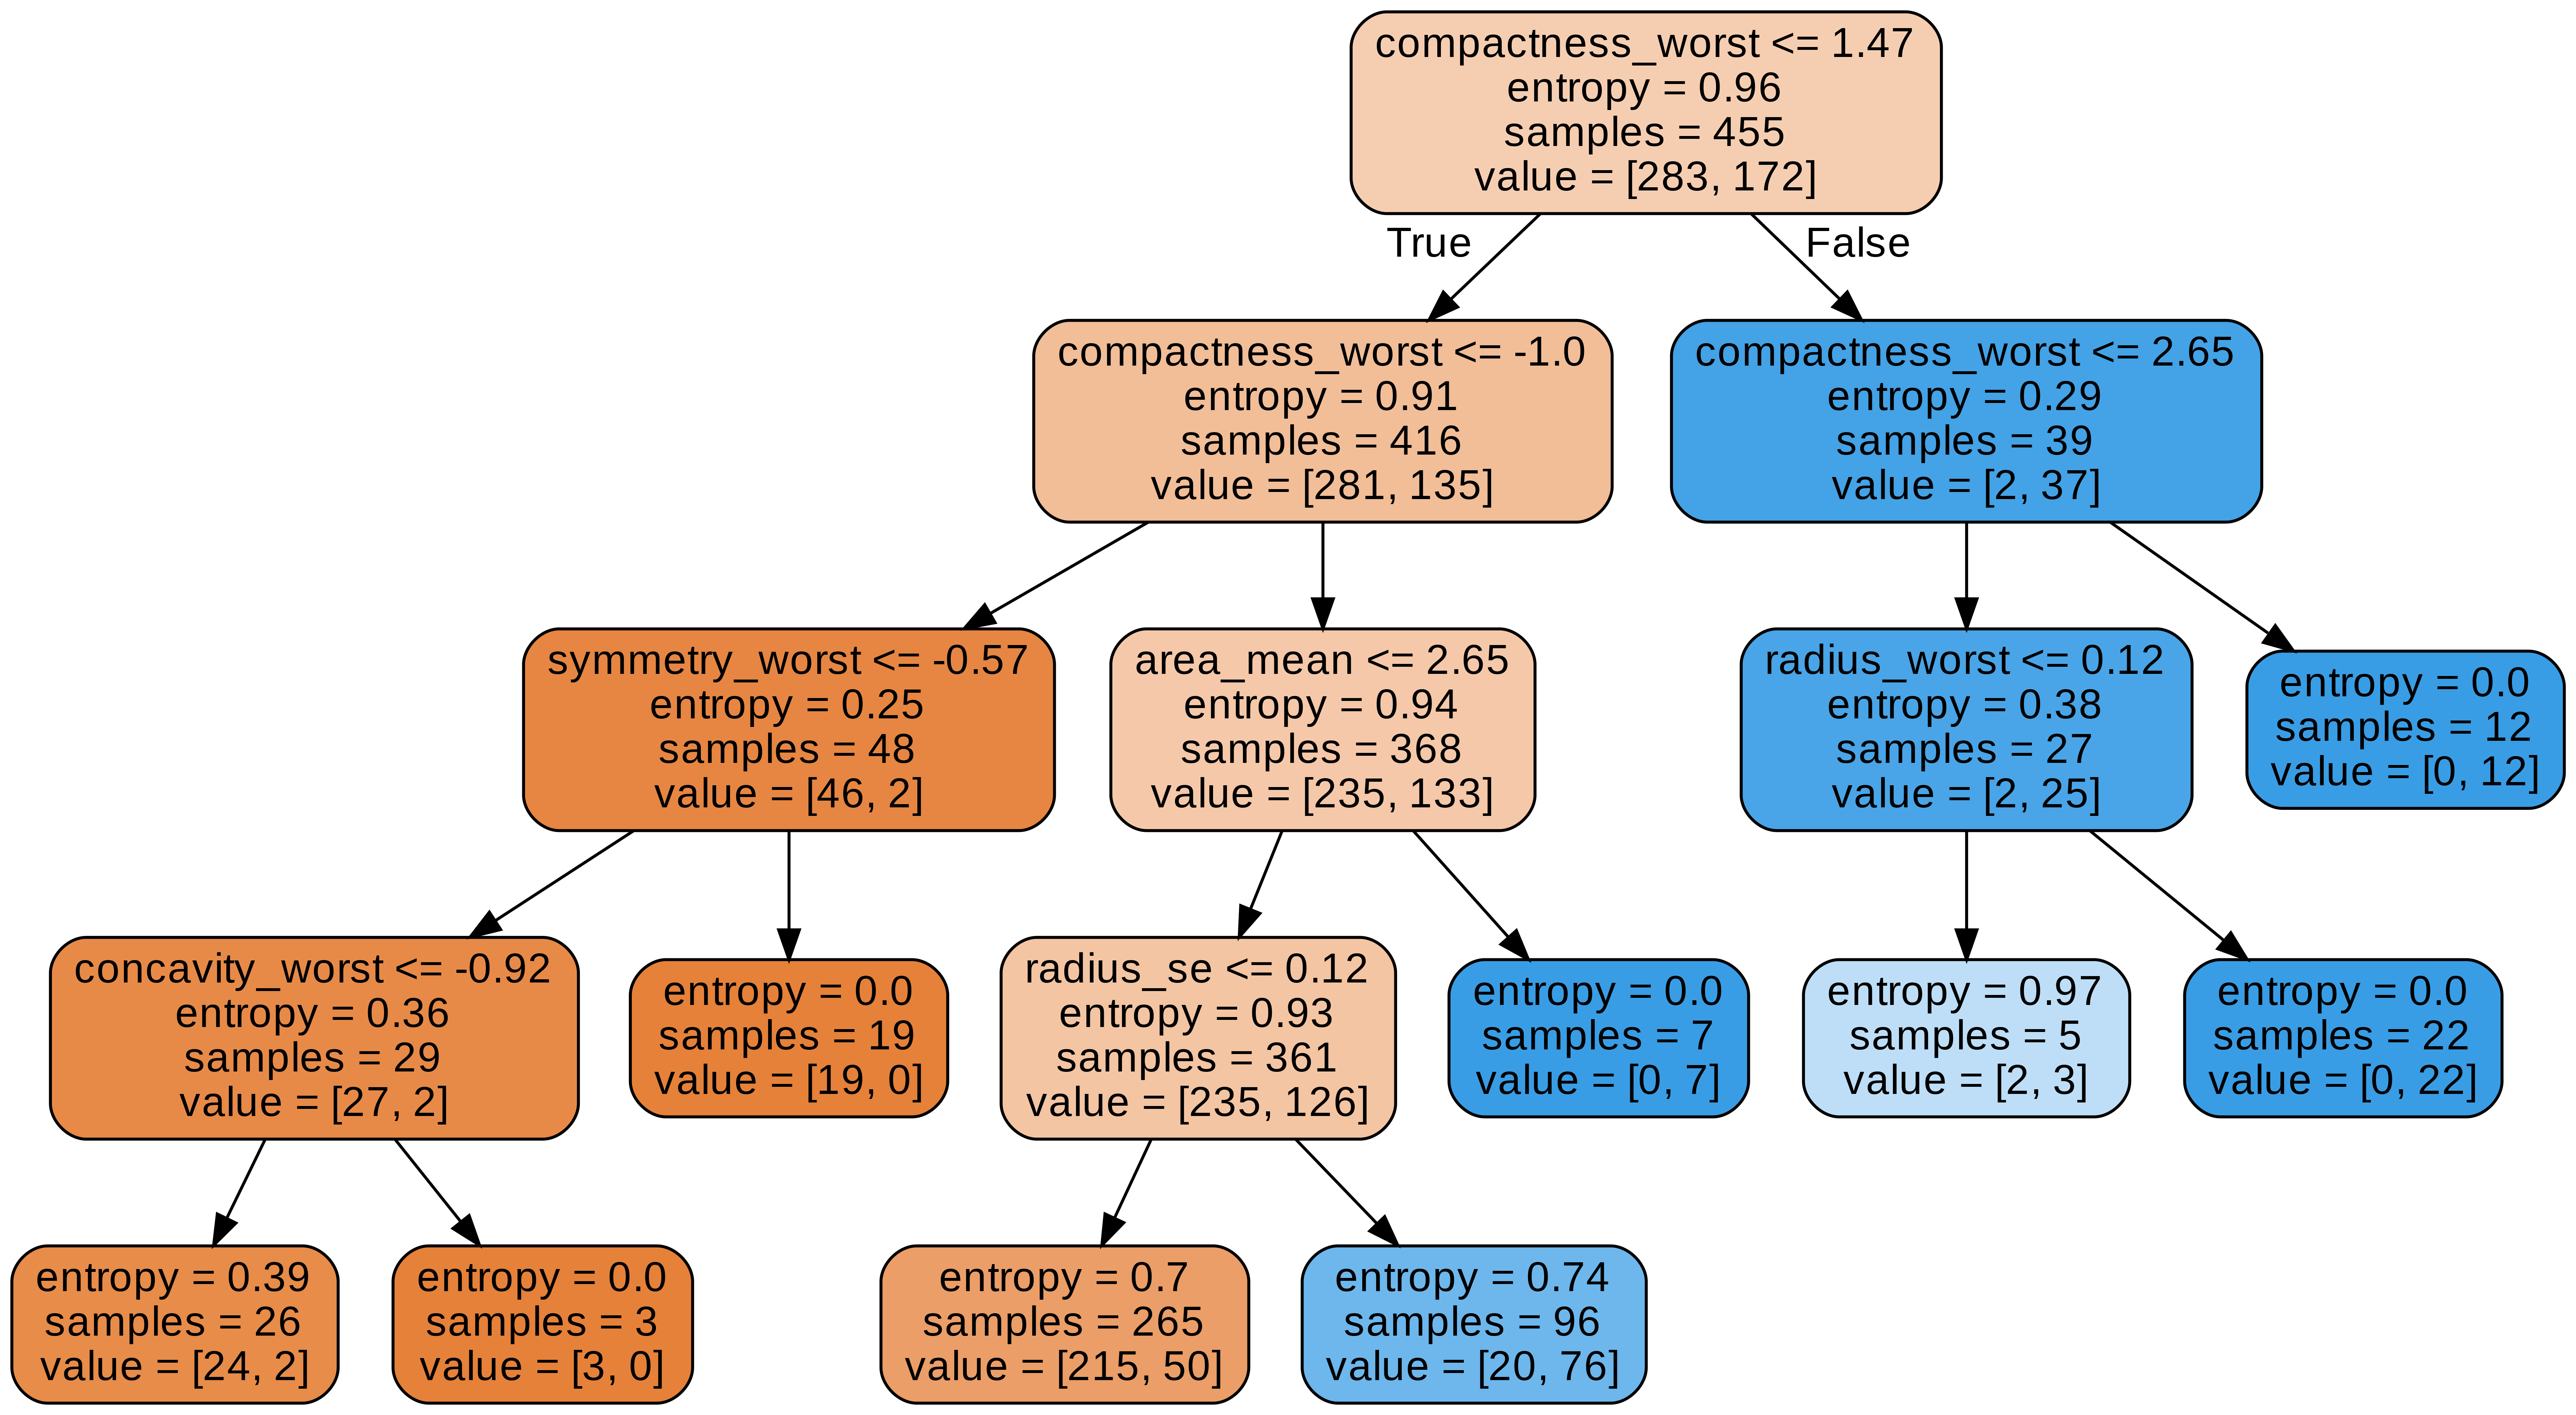

In [352]:
from sklearn.tree import export_graphviz


export_graphviz(tree1, out_file='tree1.dot', 
                feature_names = features,
                class_names = None,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree1.dot', '-o', 'tree1.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree1.png')

In [353]:
#predict y
from sklearn.metrics import accuracy_score
y_test_predic = tree1.predict(X_test)

print("The Decision Tree accuracy is ", accuracy_score(y_test, y_test_predic)*100, "%")

The Decision Tree accuracy is  86.8421052631579 %


In [354]:
# Try Building  Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
tree2 = RandomForestClassifier(max_features='sqrt', n_estimators=300, n_jobs=-1, oob_score = True)
tree2.fit(X_train, y_train)

# Evaluating on training set
rfc_pred_train =tree2.predict(X_train)
y2_test_predic = tree2.predict(X_test)

print("The Random Forest accuracy is ", accuracy_score(y_test, y2_test_predic)*100, "%")

The Random Forest accuracy is  96.49122807017544 %


In [381]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

KNN_ = KNeighborsClassifier(n_neighbors = 3)
KNN_.fit(X_train, y_train)

y_knn_pre = KNN_.predict(X_test) 

print("The Accuracy of KNN:", metrics.accuracy_score(y_test, y_knn_pre )*100, "%")


The Accuracy of KNN: 98.24561403508771 %


**Combination**

In [359]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [360]:
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('RF',  RandomForestClassifier(n_estimators=100)))

In [361]:
X_train_cross, X_test_cross, y_train_cross, y_test_cross = train_test_split(x, y, test_size= 0.2, random_state=0)

In [362]:
names = []
scores = []

for name, model in models:
    model.fit(X_train_cross, y_train_cross)
    y_pred_cross = model.predict(X_test_cross)
    scores.append(accuracy_score(y_test_cross, y_pred_cross))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.964912
1   DT  0.956140
2   RF  0.964912


In [375]:
strat_k_fold = StratifiedKFold(n_splits=10, random_state= None)

names = []
scores = []

for name, model in models:
    
    score = cross_val_score(model, x, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

  Name     Score
0  KNN  0.968390
1   DT  0.919173
2   RF  0.964881


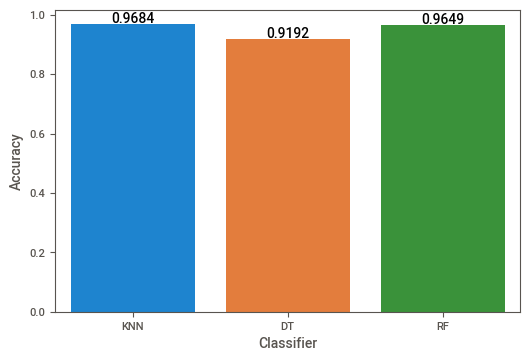

In [376]:
import seaborn as sns
import matplotlib.pyplot as plt

axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

Basically, there is not too much difference between these modeling method. 
KNN has the highest winning prediction rate compared to the decision tree and randome forest.